# Data Preparation

In [1]:
import os
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
folder_path = '/content/drive/My Drive/news_classifier/'
file_list = os.listdir(folder_path)

In [4]:
file_name = 'News_Category_Dataset_v3.json'
full_path = os.path.join(folder_path, file_name)
data = pd.read_json(full_path, lines=True)

## Explore data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [6]:
data['category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [7]:
#show the empty lines in the [headline] column
data.loc[data["headline"] == ""]

,link,headline,category,short_description,authors,date
90944,https://www.huffingtonpost.com/entry/lincoln-2...,,POLITICS,,"Robert Moran, ContributorRobert Moran leads Br...",2015-08-22
95567,https://www.huffingtonpost.com/entry/post_9671...,,RELIGION,Let everyone not wrapped in tired and disprove...,"Matthew Fox, ContributorRadical theologian Mat...",2015-06-30
103675,https://www.huffingtonpost.com/entry/us-and-eu...,,WORLDPOST,,"Natasha Srdoc, ContributorAuthor, Economist, C...",2015-03-29
109100,https://www.huffingtonpost.com/entry/disney-ce...,,BUSINESS,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-25
110153,https://www.huffingtonpost.com/entry/beverly-h...,,MEDIA,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-13
122145,https://www.huffingtonpost.com/entry/beverly-h...,,QUEER VOICES,,"Gary Snyder, ContributorWriter and Media Strat...",2014-08-28


In [8]:
#show the empty lines in the [short_description] column
data.loc[data["short_description"] == "",]

,link,headline,category,short_description,authors,date
20773,https://www.huffingtonpost.com/entry/the-big-b...,The Big Blue Wave,COMEDY,,"Shan Wells, ContributorSciency sun venerator +...",2017-11-10
21523,https://www.huffingtonpost.com/entry/inside-ru...,"Inside Rukban Camp, One Of Syria’s Most Desper...",WORLD NEWS,,"Yasser Allawi, Syria Deeply",2017-10-31
22793,https://www.huffingtonpost.com/entry/syrian-re...,Syrian Refugees Return From Lebanon Only To Fl...,WORLD NEWS,,"Abby Sewell, Refugees Deeply",2017-10-14
32223,https://www.huffingtonpost.com/entry/your-guid...,Your Guide To The Best BBQ In St. Louis Accord...,TASTE,,,2017-06-19
34488,https://www.huffingtonpost.com/entry/the-bechd...,The Bechdel Test,COMEDY,,"Hilary Fitzgerald Campbell, ContributorHilary'...",2017-05-24
...,...,...,...,...,...,...
206924,https://www.huffingtonpost.com/entry/true-lgbt...,True LGBTQ Stories: When A College Football Te...,QUEER VOICES,,"Nathan Manske, Contributor\nExecutive Director...",2012-02-25
206939,https://www.huffingtonpost.com/entry/chasing-i...,'Chasing Ice' -- The Climate Change Debate Is ...,ENVIRONMENT,,"Greg Reitman, Contributor\nFounder of Blue Wat...",2012-02-25
208803,https://www.huffingtonpost.com/entry/love-is-l...,Practice for International Kissing Day: 'Love ...,IMPACT,,"Karen Dalton-Beninato, Contributor\nWriter Nea...",2012-02-05
208865,https://www.huffingtonpost.com/entry/zach-hust...,"Zach Huston, Victim of Brutal Ohio School Bull...",QUEER VOICES,,"Ian Thompson, Contributor\nLegislative Represe...",2012-02-04


## Pre-processing data

In [9]:
# remove the link, date, authors and short_description column
data_cleaned = data.drop(['link', 'date', 'authors'], axis=1)

In [10]:
# remove empty rows in headline and short_description
def remove_empty_rows(df):
	return df.loc[(df['headline'] != "") & (df['short_description'] != "")]

In [11]:
data_cleaned = remove_empty_rows(data_cleaned)

In [12]:
#Verify that empty line was remove successfully
print((data_cleaned["headline"] == "").sum())
print((data_cleaned["short_description"] == "").sum())

0
0


In [13]:
data_cleaned.describe()

,headline,category,short_description
count,189814,189814,189814
unique,188417,42,187020
top,Sunday Roundup,POLITICS,Welcome to the HuffPost Rise Morning Newsbrief...
freq,90,32441,192


In [14]:
# show all the categories
data_cleaned['category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [15]:
# show category 'fifty'
data_cleaned.loc[data_cleaned['category'] == 'TASTE']

,headline,category,short_description
16173,It's Weird That American Restaurants Serve Ice...,TASTE,But why do we even have ice in our drinks in t...
16242,"Pineapple Casserole, The Southern Dish That's ...",TASTE,"It's got pineapple, cheddar and a whole lot of..."
16516,How To Actually Get A Bartender's Attention,TASTE,Plus other things they wish you knew.
16599,Diet Coke's Millennial-Inspired Makeover Leave...,TASTE,"It's not like a regular soda, it's a cool soda."
16776,We Tested The New 'Tearless' Onions To See If ...,TASTE,"Put away your goggles, people."
...,...,...,...
133523,The Most Bizarre Canned Foods From Around The ...,TASTE,There are plenty of foods that have no busines...
133595,The Answers To Every Question You've Never Ask...,TASTE,Do you love 'em or hate 'em?
133602,"Margarita Fanatics, We've Got Your Swag",TASTE,If Jimmy Buffet's Margaritaville is your happy...
133635,Easter Cheese Crescia,TASTE,I collected this recipe from scraps found in m...


In [16]:
# chnage name of category 'U.S. NEWS' to 'NEWS'
data_cleaned['category'] = data_cleaned['category'].replace('U.S. NEWS', 'NEWS')

In [17]:
# chnage name of category 'ARTS & CULTURE' to 'CELEBRITIES'
data_cleaned['category'] = data_cleaned['category'].replace('ARTS & CULTURE', 'CELEBRITIES')

In [18]:
data_cleaned.category = data_cleaned.category.map(lambda x: 'EDUCATION' if x == 'COLLEGE' else x)

In [19]:
data_cleaned.category = data_cleaned.category.map(lambda x: 'CULTURE & ARTS' if x == 'ARTS' else x)

In [20]:
data_cleaned.category = data_cleaned.category.map(lambda x: 'STYLE & BEAUTY' if x == 'STYLE' else x)

In [21]:
data_cleaned.category = data_cleaned.category.map(lambda x: 'FOOD & DRINK' if x == 'TASTE' else x)

In [22]:
data_cleaned.category = data_cleaned.category.map(lambda x: 'PARENTING' if x == 'PARENTS' else x)

In [23]:
# remove the categories
data_cleaned = data_cleaned.loc[~data_cleaned['category'].isin(['QUEER VOICES', 'LATINO VOICES', 'THE WORLDPOST', 'WORLDPOST', 'BLACK VOICES', 'GOOD NEWS', 'WEDDINGS', 'DIVORCE'])]

In [24]:
data_cleaned['category'].unique()

array(['NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'HOME & LIVING', 'WOMEN', 'TRAVEL', 'MONEY', 'RELIGION', 'IMPACT',
       'CELEBRITIES', 'GREEN', 'HEALTHY LIVING', 'FIFTY'], dtype=object)

In [25]:
# show how many articles are in each category
data_cleaned['category'].value_counts()

category
POLITICS          32441
WELLNESS          17943
ENTERTAINMENT     14774
PARENTING         12346
STYLE & BEAUTY    11369
TRAVEL             9421
FOOD & DRINK       8271
HEALTHY LIVING     5265
BUSINESS           5132
COMEDY             4642
SPORTS             4414
HOME & LIVING      4317
WORLD NEWS         3297
WOMEN              3184
IMPACT             3086
CRIME              2832
MEDIA              2404
WEIRD NEWS         2316
TECH               2103
GREEN              2046
CULTURE & ARTS     1926
RELIGION           1878
EDUCATION          1823
SCIENCE            1803
MONEY              1755
ENVIRONMENT        1442
NEWS               1377
CELEBRITIES        1339
FIFTY              1042
Name: count, dtype: int64

In [26]:
#Selecting only the first 1042 rows of each category for training
data_train = data_cleaned.groupby('category').head(1042)

In [27]:
# create the training tests ('headline and short_description') and labels('category')
data_texts = data_cleaned['headline'] + " " + data_cleaned['short_description']
data_labels = data_cleaned['category']


## Collect Key Metrics

In [28]:
# list of each unique category in the data_labels and code it to a numbers (as a list)
labels = data_labels.unique().tolist()
labels = [i for i in range(len(labels))]

In [29]:
# number of classes
def get_num_classes(labels):
    """Gets the total number of classes.

    # Arguments
        labels: list, label values.
            There should be at lease one sample for values in the
            range (0, num_classes -1)

    # Returns
        int, total number of classes.

    # Raises
        ValueError: if any label value in the range(0, num_classes - 1)
            is missing or if number of classes is <= 1.
    """
    num_classes = max(labels) + 1
    missing_classes = [i for i in range(num_classes) if i not in labels]
    if len(missing_classes):
        raise ValueError('Missing samples with label value(s) '
                         '{missing_classes}. Please make sure you have '
                         'at least one sample for every label value '
                         'in the range(0, {max_class})'.format(
                            missing_classes=missing_classes,
                            max_class=num_classes - 1))

    if num_classes <= 1:
        raise ValueError('Invalid number of labels: {num_classes}.'
                         'Please make sure there are at least two classes '
                         'of samples'.format(num_classes=num_classes))
    return num_classes

In [30]:
get_num_classes(labels)

29

In [31]:
# number of samples per class
def get_samples_per_class(labels):
	"""Gets the number of samples per class.

	# Arguments
		labels: list, label values.

	# Returns
		dict, map from class index to the number of samples in each class.
	"""
	samples_per_class = {}
	for label in labels:
		if label not in samples_per_class:
			samples_per_class[label] = 0
		samples_per_class[label] += 1
	return samples_per_class

In [32]:
get_samples_per_class(data_labels)

{'NEWS': 1377,
 'COMEDY': 4642,
 'PARENTING': 12346,
 'WORLD NEWS': 3297,
 'CULTURE & ARTS': 1926,
 'TECH': 2103,
 'SPORTS': 4414,
 'ENTERTAINMENT': 14774,
 'POLITICS': 32441,
 'WEIRD NEWS': 2316,
 'ENVIRONMENT': 1442,
 'EDUCATION': 1823,
 'CRIME': 2832,
 'SCIENCE': 1803,
 'WELLNESS': 17943,
 'BUSINESS': 5132,
 'STYLE & BEAUTY': 11369,
 'FOOD & DRINK': 8271,
 'MEDIA': 2404,
 'HOME & LIVING': 4317,
 'WOMEN': 3184,
 'TRAVEL': 9421,
 'MONEY': 1755,
 'RELIGION': 1878,
 'IMPACT': 3086,
 'CELEBRITIES': 1339,
 'GREEN': 2046,
 'HEALTHY LIVING': 5265,
 'FIFTY': 1042}

In [33]:
# number of words per sample
def get_num_words_per_sample(sample_texts):
    """Gets the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

In [34]:
get_num_words_per_sample(data_texts)

29.0

In [35]:
# distribution of sample length
def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()

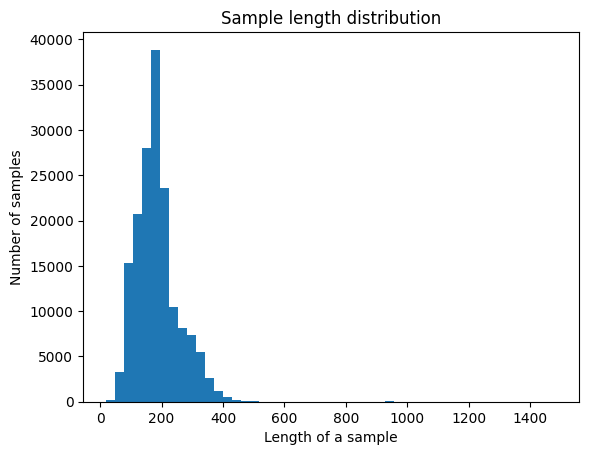

In [36]:
plot_sample_length_distribution(data_texts)

In [37]:
# calculate ratio between the samples/words-per-sample
len(data_texts) / get_num_words_per_sample(data_texts)

5723.724137931034

## Export Data

In [38]:
data_texts.to_csv('data_texts.csv', index=False)
data_labels.to_csv('data_labels.csv', index=False)